# Demo LoFTR-DS on a single pair of images

This notebook shows how to use the loftr matcher with default config(dual-softmax) and the pretrained weights.

In [1]:
import os
#os.chdir("..")
os.chdir(os.pardir)
import torch
import cv2
import numpy as np
import matplotlib.cm as cm
from src.utils.plotting import make_matching_figure


## Indoor Example

In [2]:
from src.loftr import LoFTR, default_cfg

# The default config uses dual-softmax.
# The outdoor and indoor models share the same config.
# You can change the default values like thr and coarse_match_type.
matcher = LoFTR(config=default_cfg)
matcher.load_state_dict(torch.load("/home/pengguohao/CV/pytorch/LoFTR/weights/indoor_ds.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

In [3]:
# Load example images
# img0_pth = "/home/pengguohao/CV/pytorch/LoFTR/assets/scannet_sample_images/scene0711_00_frame-001680.jpg"
# img1_pth = "/home/pengguohao/CV/pytorch/LoFTR/assets/scannet_sample_images/scene0711_00_frame-001995.jpg"
img0_pth = "/home/pengguohao/CV/pytorch/LoFTR/assets/samples/00008.jpg"
img1_pth = "/home/pengguohao/CV/pytorch/LoFTR/assets/samples/00009.jpg"
img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)
img0_raw = cv2.resize(img0_raw, (640, 480))
img1_raw = cv2.resize(img1_raw, (640, 480))

img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255. #[1,1,480,640]
img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
batch = {'image0': img0, 'image1': img1}

# Inference with LoFTR and get prediction
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_c'].cpu().numpy() #(num_matches,2)
    mkpts1 = batch['mkpts1_c'].cpu().numpy() #(num_matches,2)
    mconf = batch['mconf'].cpu().numpy() #(num_matches,)
    print(mkpts0.shape,'demonb')

(1297, 2) demonb


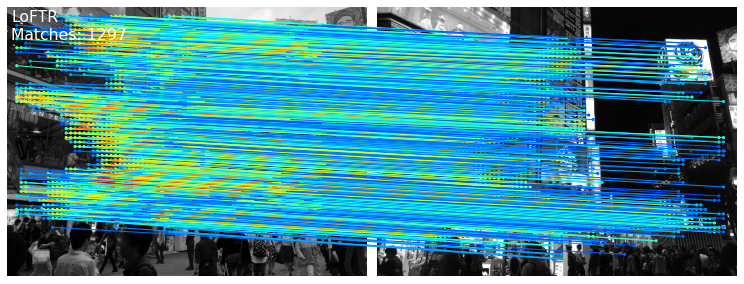

In [4]:
# Draw
color = cm.jet(mconf) #(num_matches,4)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)), #num_matches
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text)

## Outdoor Example

In [5]:
from src.loftr import LoFTR, default_cfg

# The default config uses dual-softmax.
# The outdoor and indoor models share the same config.
# You can change the default values like thr and coarse_match_type.
matcher = LoFTR(config=default_cfg)
matcher.load_state_dict(torch.load("/home/pengguohao/CV/pytorch/LoFTR/weights/outdoor_ds.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

In [8]:
# Load example images
# img0_pth = "/home/pengguohao/CV/pytorch/LoFTR/assets/phototourism_sample_images/united_states_capitol_26757027_6717084061.jpg"
# img1_pth = "/home/pengguohao/CV/pytorch/LoFTR/assets/phototourism_sample_images/united_states_capitol_98169888_3347710852.jpg"
img0_pth = "/home/pengguohao/CV/pytorch/LoFTR/assets/samples/00109.jpg"
img1_pth = "/home/pengguohao/CV/pytorch/LoFTR/assets/samples/00020.jpg"
img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)
img0_raw = cv2.resize(img0_raw, (img0_raw.shape[1]//8*8, img0_raw.shape[0]//8*8))  # input size shuold be divisible by 8
img1_raw = cv2.resize(img1_raw, (img1_raw.shape[1]//8*8, img1_raw.shape[0]//8*8))

img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
batch = {'image0': img0, 'image1': img1}

# Inference with LoFTR and get prediction
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()
    mkpts1 = batch['mkpts1_f'].cpu().numpy()
    mconf = batch['mconf'].cpu().numpy()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# Draw
color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text)